In [ ]:
import sys
!{sys.executable} -m pip install pymoo  # For ipopt solver

# Install a pip package in the current Jupyter kernel

from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

restartkernel()

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import os
from spyci import spyci
import matplotlib.pyplot as plt
%matplotlib inline

# Write a file 4th_order_rc_test.spice

In [15]:
%%writefile 4th_order_rc_test.spice
***** 4th Order RC Circuit Frequency Response *****
.PARAM R_1 = 2096.530184823837
.PARAM C_1 = 5.710242851887112e-08
.PARAM R_2 = 2096.530184823837
.PARAM C_2 = 5.710242851887112e-08
.PARAM R_3 = 2096.530184823837
.PARAM C_3 = 5.710242851887112e-08
.PARAM R_4 = 2096.530184823837
.PARAM C_4 = 5.710242851887112e-08
.PARAM START = 1
.PARAM STOP = 1000000000.0
**--**--**--**--**--**--**--**--**--**
r1 1 2 {R_1}
c1 2 0 {C_1}
r2 2 3 {R_2}
c2 3 0 {C_2}
r3 3 4 {R_3}
c3 4 0 {C_3}
r4 4 5 {R_4}
c4 5 0 {C_4}

********Specifying an AC source with zero dc
vin 1 0 dc 0 ac 1
********AC analysis for 1 Hz to 1MHz, 10 points per decade
.ac dec 10 {START} {STOP}


.control
set filetype=ascii
run

let m=vdb(5)

*plot m xlog

meas ac cutoff find frequency WHEN m=-3.0 CROSS=LAST

write 4th_order_rc_test.raw cutoff vdb(2) vdb(3) vdb(4) vdb(5)
.endc
.end

Overwriting 4th_order_rc_test.spice


In [22]:
filename="4th_order_rc_test.raw"
data = spyci.load_raw(filename)  # see 'Data structure' section below
spyci.list_vars(filename)

Variables:

  idx  name    type
-----  ------  -------------
    1  cutoff  notype dims=1
    2  vdb(2)  decibel
    3  vdb(3)  decibel
    4  vdb(4)  decibel
    5  vdb(5)  decibel


In [5]:
def add_param_lines(file_path, param_names_and_values):
    
  if not os.path.exists(file_path):
    raise FileNotFoundError("File does not exist: {}".format(file_path))

  with open(file_path, "r") as f:
    lines = f.readlines()

  first_line = lines[0]

  param_lines = []
  for param_name, param_value in param_names_and_values:
    param_lines.append(".PARAM {} = {}\n".format(param_name, param_value))

  # Find the index of the line with the text `"**--**--**--**--**--**--**--**--**--**\n`
  recognizer="**--**--**--**--**--**--**--**--**--**\n"
  try:
      index = lines.index(recognizer)
      new_lines = [first_line] + param_lines + [recognizer] + lines[index + 1:]
  except ValueError:
      new_lines = [first_line] + param_lines + [recognizer] + lines[1:]

  with open(file_path, "w") as f:
    f.writelines(new_lines)


In [6]:
def get_values(filename, pvars=None):
    """
    Load the values from a SPICE raw file and return a list of arrays.

    Args:
        filename (str): The path to the SPICE raw file.
        pvars (list): A list of string variables to load. If None, all variables are loaded.

    Returns:
        list: A list of arrays, one for each variable in pvars.
    """

    d = spyci.load_raw(filename)
    xx = []
    for var in pvars:
        xx.append(d['values'][var].real)
    return xx

# Test the add_param_function

In [7]:
filename = "4th_order_rc_test.spice"
param_names_and_values = [
    
    ["R_1",   1e3], 
    ["C_1",   1e-6],
    ["R_2",   1e3], 
    ["C_2",   1e-6],
    ["R_3",   1e3], 
    ["C_3",   1e-6],
    ["R_4",   1e3], 
    ["C_4",   1e-6],
    ["START", 1], 
    ["STOP",  1e8]
    
    ]
add_param_lines(filename, param_names_and_values)

# View the contents

In [17]:
r=os.system("cat 4th_order_rc_test.spice")

***** 4th Order RC Circuit Frequency Response *****
.PARAM R_1 = 2096.530184823837
.PARAM C_1 = 5.710242851887112e-08
.PARAM R_2 = 2096.530184823837
.PARAM C_2 = 5.710242851887112e-08
.PARAM R_3 = 2096.530184823837
.PARAM C_3 = 5.710242851887112e-08
.PARAM R_4 = 2096.530184823837
.PARAM C_4 = 5.710242851887112e-08
.PARAM START = 1
.PARAM STOP = 1000000000.0
**--**--**--**--**--**--**--**--**--**
r1 1 2 {R_1}
c1 2 0 {C_1}
r2 2 3 {R_2}
c2 3 0 {C_2}
r3 3 4 {R_3}
c3 4 0 {C_3}
r4 4 5 {R_4}
c4 5 0 {C_4}

********Specifying an AC source with zero dc
vin 1 0 dc 0 ac 1
********AC analysis for 1 Hz to 1MHz, 10 points per decade
.ac dec 10 {START} {STOP}


.control
set filetype=ascii
run

let m=vdb(5)

*plot m xlog

meas ac cutoff find frequency WHEN m=-3.0 CROSS=LAST

write 4th_order_rc_test.raw cutoff vdb(2) vdb(3) vdb(4) vdb(5)
.endc
.end


# Test the get_values function

In [18]:
get_values("4th_order_rc_test.raw",['cutoff'])


[array([399.9999,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
          0.    ,   0.    ,   0.    ,   0.    , 

In [19]:
import os
def run_spice_again(x,filename):
    param_names_and_values = [
    
        ["R_1",   x[0]], 
        ["C_1",   x[1]],
        ["R_2",   x[2]], 
        ["C_2",   x[3]],
        ["R_3",   x[4]], 
        ["C_3",   x[5]],
        ["R_4",   x[6]], 
        ["C_4",   x[7]],
        ["START", 1], 
        ["STOP",  1e9]
        ]
    add_param_lines(filename, param_names_and_values)
    
    os.system("ngspice -b 4th_order_rc_test.spice -o .temp > .temp")
    os.system("rm -f .temp")
    filename="4th_order_rc_test.raw"
    data = spyci.load_raw(filename)  # see 'Data structure' section below
    cutoff_value=get_values(filename,['cutoff'])[0][0]
#     print(cutoff_value)
    return cutoff_value

print(run_spice_again([1.2e3,1e-8,1e3,1e-7,1.5e3,1e-8,1.7e3,1e-8],"4th_order_rc_test.spice"))

562.7918


In [12]:
import numpy as np
from pymoo.problems.functional import FunctionalProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize

def find_values(n_var,x,range_l,range_u,Target_F_cut,objs,max_generations,verbose=True):

  # now put everything together to a problem object
  problem = FunctionalProblem(n_var,
                              objs,
                              # constr_ieq=constr_ieq,
                              xl=np.array(range_l),
                              xu=np.array(range_u)
                              )
  # F= problem.evaluate([x])
  # print(f"F: {F}\n")
  ############
  algorithm = NSGA2(
    pop_size=45,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=15),
    eliminate_duplicates=True
  )
  ##############
  termination = get_termination("n_gen", max_generations)
  ##############
  res = minimize(problem,
               algorithm,
               termination,
               seed=9,
               save_history=True,
               verbose=verbose)
  
  return res


In [20]:
#########################
range_l=[200, 1e-9, 200, 1e-9,200, 1e-9, 200, 1e-9]
range_u=[8000, 100e-9,5000, 100e-9,8000, 100e-9,5000, 100e-9]
target_f=400
current_x=[1800,88.2097e-9,1800,88.2097e-9,1800,88.2097e-9,1800,88.2097e-9]## correct for 1000Hz
max_generations=100
verbose=True

# run_spice_again(current_x,"4th_order_rc_test.spice")
#########################COST_FUNCTION##########################################
cost_function = [
    lambda x: (run_spice_again(x,"4th_order_rc_test.spice")-target_f)**2 ########  x[0]=R,x[1]=C
]
################################################################################

r=find_values(8,current_x,range_l,range_u, target_f,cost_function,max_generations,verbose=verbose)

result=r.X.T
result


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       45 |      1 |             - |             -
     2 |       55 |      1 |  0.000000E+00 |             f
     3 |       65 |      1 |  0.000000E+00 |             f
     4 |       75 |      1 |  0.000000E+00 |             f
     5 |       85 |      1 |  3.451585E+02 |         ideal
     6 |       95 |      1 |  0.000000E+00 |             f
     7 |      105 |      1 |  0.000000E+00 |             f
     8 |      115 |      1 |  0.000000E+00 |             f
     9 |      125 |      1 |  0.000000E+00 |             f
    10 |      135 |      1 |  0.000000E+00 |             f
    11 |      145 |      1 |  0.000000E+00 |             f
    12 |      155 |      1 |  4.6768009500 |         ideal
    13 |      165 |      1 |  1.6075036500 |         ideal
    14 |      175 |      1 |  3.218740E+01 |         ideal
    15 |      185 |      1 |  0.000000E+00 |             f
    16 |      195 |      1 |  0.000000E+00 |            

array([[1.62994854e+03, 1.62994854e+03],
       [8.43480717e-08, 8.43485507e-08],
       [2.78996252e+03, 2.78996252e+03],
       [2.65805300e-08, 2.65805300e-08],
       [3.58394202e+02, 3.58394202e+02],
       [3.84519769e-08, 3.84519572e-08],
       [2.27185819e+03, 2.27185949e+03],
       [4.82751683e-09, 4.82742594e-09]])

In [21]:
R_opt1=result[0][0]  #1kOhm
C_opt1=result[1][0]  # 1µF
R_opt2=result[2][0]  #1kOhm
C_opt2=result[3][0]  # 1µF
R_opt3=result[4][0]  #1kOhm
C_opt3=result[5][0]  # 1µF
R_opt4=result[6][0]  #1kOhm
C_opt4=result[7][0]  # 1µF
F_cut = run_spice_again([R_opt1,C_opt1,R_opt2,C_opt2,R_opt3,C_opt3,R_opt4,C_opt4],"4th_order_rc_test.spice")
print("========================================")
print("Target cut off frequency is: {:7.3f} Hz".format(target_f))
print("Obtained cut off frequency(Optimized value ) is: {:7.3f} Hz".format(F_cut))
print("Percentage Error is: {:7.3f} %".format(((F_cut-target_f)*100/target_f)))

print("Resistance R1(Optimized value ) is: {:7.3f} Kilo Ohms".format(R_opt1/1e3))
print("Capacitance C1(Optimized value ) is: {:7.3f} nanofarads".format(C_opt1*1e9))
print("Resistance R2(Optimized value ) is: {:7.3f} Kilo Ohms".format(R_opt2/1e3))
print("Capacitance C2(Optimized value ) is: {:7.3f} nanofarads".format(C_opt2*1e9))
print("Resistance R3(Optimized value ) is: {:7.3f} Kilo Ohms".format(R_opt3/1e3))
print("Capacitance C3(Optimized value ) is: {:7.3f} nanofarads".format(C_opt3*1e9))
print("Resistance R4(Optimized value ) is: {:7.3f} Kilo Ohms".format(R_opt4/1e3))
print("Capacitance C4(Optimized value ) is: {:7.3f} nanofarads".format(C_opt4*1e9))
print("========================================")

Target cut off frequency is: 400.000 Hz
Obtained cut off frequency(Optimized value ) is: 400.000 Hz
Percentage Error is:  -0.000 %
Resistance R1(Optimized value ) is:   1.630 Kilo Ohms
Capacitance C1(Optimized value ) is:  84.348 nanofarads
Resistance R2(Optimized value ) is:   2.790 Kilo Ohms
Capacitance C2(Optimized value ) is:  26.581 nanofarads
Resistance R3(Optimized value ) is:   0.358 Kilo Ohms
Capacitance C3(Optimized value ) is:  38.452 nanofarads
Resistance R4(Optimized value ) is:   2.272 Kilo Ohms
Capacitance C4(Optimized value ) is:   4.828 nanofarads


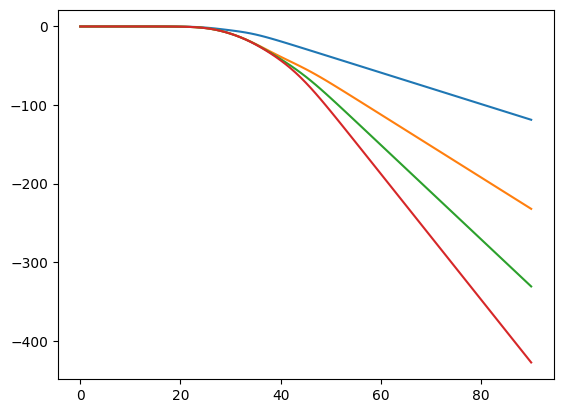

In [27]:
values=get_values("4th_order_rc_test.raw",['cutoff','vdb(2)','vdb(3)','vdb(4)','vdb(5)'])
plt.plot(values[1])
plt.plot(values[2])
plt.plot(values[3])
plt.plot(values[4])
plt.show()